In [ ]:
from google.colab import files
uploaded = files.upload()

import zipfile
with zipfile.ZipFile('Full-year-car-registrations-2025.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/smmt_data/')

import os
os.listdir('/content/smmt_data/')


Saving Full-year-car-registrations-2025.zip to Full-year-car-registrations-2025.zip


['FY 2025 top 10 BEV cars.png',
 'Annual registrations 2009 to 2025.png',
 'Dec Sales 2025 and YTD cars.png',
 'Dec Fuel 2025 and YTD cars.jpg',
 'Dec Fuel 2025 and YTD cars.png',
 'Dec 2025 top models_cars.png',
 'Annual registrations 2009 to 2025.jpg',
 'Dec Sales 2025 and YTD cars.jpg',
 'Dec 25 car registrations social graphic.png',
 'SMMT News Release - New Car Registrations December Full Year 2025.docx',
 'Cars_12_2025.xlsx',
 'Dec 2025 top models_cars.jpg']

In [ ]:
import os
import zipfile
import pandas as pd


print("Files in /content:")
print(os.listdir('/content'))


Files in /content:
['.config', 'Full-year-car-registrations-2025.zip', 'smmt_data', 'Cars_12_2025.xlsx', 'sample_data']


In [ ]:
zip_path = '/content/Full-year-car-registrations-2025.zip'

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/content/smmt_data/')
        print("Files in ZIP:")
        print(zip_ref.namelist())
else:
    print("ZIP file not found. Check the filename above.")


Files in ZIP:
['Annual registrations 2009 to 2025.jpg', 'Dec 2025 top models_cars.jpg', 'Dec Fuel 2025 and YTD cars.jpg', 'Dec Sales 2025 and YTD cars.jpg', 'Cars_12_2025.xlsx', 'SMMT News Release - New Car Registrations December Full Year 2025.docx', 'Annual registrations 2009 to 2025.png', 'Dec 25 car registrations social graphic.png', 'Dec 2025 top models_cars.png', 'Dec Fuel 2025 and YTD cars.png', 'Dec Sales 2025 and YTD cars.png', 'FY 2025 top 10 BEV cars.png']


In [ ]:

print("\nExtracted files:")
extracted_files = os.listdir('/content/smmt_data/')
print(extracted_files)



Extracted files:
['FY 2025 top 10 BEV cars.png', 'Annual registrations 2009 to 2025.png', 'Dec Sales 2025 and YTD cars.png', 'Dec Fuel 2025 and YTD cars.jpg', 'Dec Fuel 2025 and YTD cars.png', 'Dec 2025 top models_cars.png', 'Annual registrations 2009 to 2025.jpg', 'Dec Sales 2025 and YTD cars.jpg', 'Dec 25 car registrations social graphic.png', 'SMMT News Release - New Car Registrations December Full Year 2025.docx', 'Cars_12_2025.xlsx', 'Dec 2025 top models_cars.jpg']


In [ ]:
import pandas as pd
import numpy as np

smmt_df = pd.read_excel('/content/smmt_data/Cars_12_2025.xlsx', sheet_name='CARS_Month_End')

print("✓ SMMT data loaded!")
print("Shape:", smmt_df.shape)


✓ SMMT data loaded!
Shape: (60, 11)


In [ ]:
print("\nFirst 15 rows:")
print(smmt_df.head(15))


First 15 rows:
   REGISTRATIONS OF NEW CARS IN THE UNITED KINGDOM\n - BY MARQUE  \
0                                                 NaN              
1                                              MARQUE              
2                                              Abarth              
3                                          Alfa Romeo              
4                                              Alpine              
5                                                Audi              
6                                             Bentley              
7                                                 Bmw              
8                                                 Byd              
9                                             Changan              
10                                              Chery              
11                                          Chevrolet              
12                                            Citroen              
13                              

In [ ]:
print("\nColumn names:")
print(smmt_df.columns.tolist())


Column names:
['REGISTRATIONS OF NEW CARS IN THE UNITED KINGDOM\n - BY MARQUE', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']


In [ ]:
# let's clean them
# Columns appear to be: MARQUE, 2025, Market%, 2024, Market%, Change%, YTD_2025, YTD_Market%, YTD_2024, YTD_Market%, YTD_Change%

# Simplify column names
smmt_clean = smmt_df.copy()
smmt_clean.columns = ['marque', 'dec_2025', 'dec_share_2025', 'dec_2024', 'dec_share_2024',
                      'dec_change_pct', 'ytd_2025', 'ytd_share_2025', 'ytd_2024', 'ytd_share_2024', 'ytd_change_pct']

# Convert to numeric (skip header rows, remove Total Market row)
for col in smmt_clean.columns[1:]:
    smmt_clean[col] = pd.to_numeric(smmt_clean[col], errors='coerce')

# Remove NaN rows and 'Total Market' row
smmt_clean = smmt_clean.dropna(subset=['ytd_2025'])
smmt_clean = smmt_clean[~smmt_clean['marque'].str.contains('Total|TOTAL|total', na=False)]

print("Cleaned data:")
print(smmt_clean.head(15))
print("\nDataset shape:", smmt_clean.shape)


Cleaned data:
        marque  dec_2025  dec_share_2025  dec_2024  dec_share_2024  \
1       MARQUE    2025.0             NaN    2024.0             NaN   
2       Abarth       4.0        0.002735      18.0        0.012785   
3   Alfa Romeo     295.0        0.201711     134.0        0.095180   
4       Alpine     373.0        0.255044      24.0        0.017047   
5         Audi    8259.0        5.647218    7175.0        5.096387   
6      Bentley      54.0        0.036923      68.0        0.048300   
7          Bmw    8688.0        5.940553    8484.0        6.026167   
8          Byd    7682.0        5.252685    1355.0        0.962454   
9      Changan     237.0        0.162052       0.0        0.000000   
10       Chery    1587.0        1.085136       0.0        0.000000   
11   Chevrolet       1.0        0.000684       0.0        0.000000   
12     Citroen    1648.0        1.126845    1935.0        1.374426   
13       Cupra    3033.0        2.073860    3054.0        2.169250   
14    

In [ ]:
#  High vs Low sales (based on YTD 2025)
smmt_clean['High_Sales'] = (smmt_clean['ytd_2025'] >= smmt_clean['ytd_2025'].median()).astype(int)

print("\nHigh vs Low sales distribution:")
print(smmt_clean['High_Sales'].value_counts())
print("\nSample data for modelling:")
print(smmt_clean[['marque', 'ytd_2025', 'ytd_share_2025', 'ytd_change_pct', 'High_Sales']].head(15))



High vs Low sales distribution:
High_Sales
0    29
1    29
Name: count, dtype: int64

Sample data for modelling:
        marque  ytd_2025  ytd_share_2025  ytd_change_pct  High_Sales
1       MARQUE    2025.0             NaN             NaN           0
2       Abarth     291.0        0.014402      -71.665044           0
3   Alfa Romeo    3000.0        0.148477       80.072029           0
4       Alpine    1742.0        0.086215      369.541779           0
5         Audi  111115.0        5.499327       -9.242757           1
6      Bentley     993.0        0.049146        8.052231           0
7          Bmw  122723.0        6.073832       -2.029298           1
8          Byd   51422.0        2.544988      485.138826           1
9      Changan     357.0        0.017669        0.000000           0
10       Chery    5517.0        0.273049        0.000000           0
11   Chevrolet      85.0        0.004207     8400.000000           0
12     Citroen   20732.0        1.026072      -31.737513  

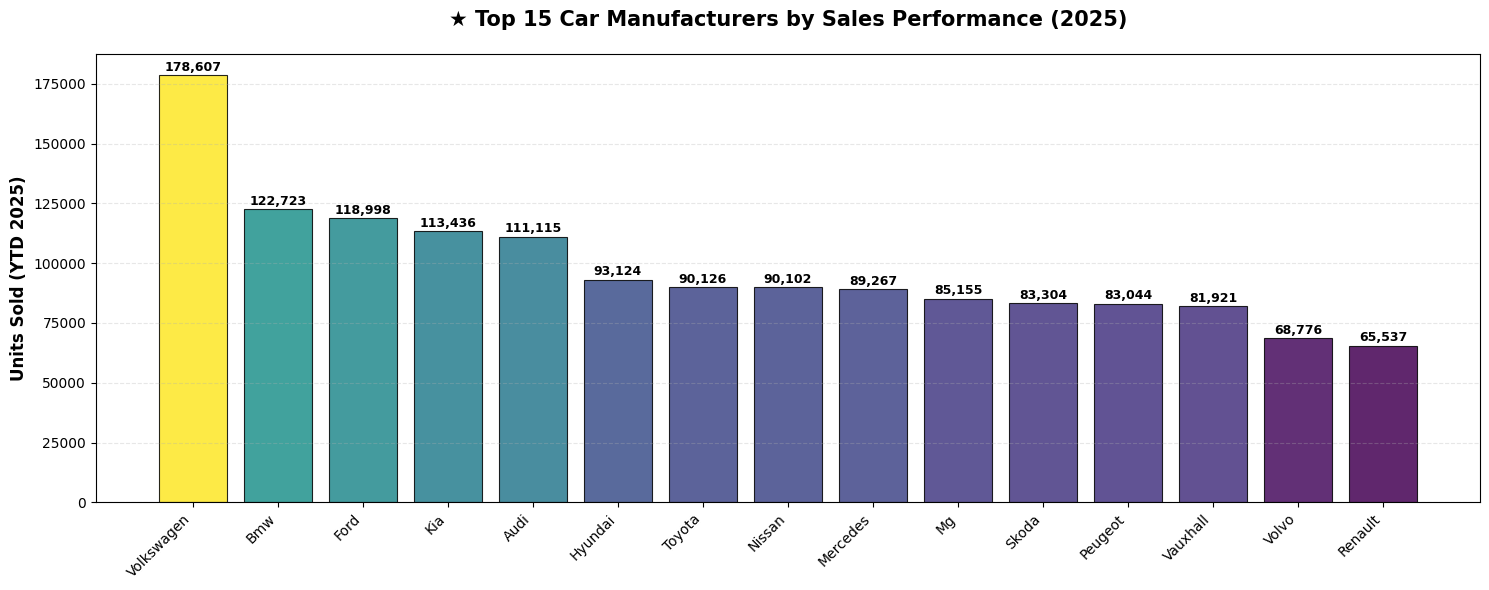

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
top_15 = smmt_clean.nlargest(15, 'ytd_2025').reset_index(drop=True)


norm = plt.Normalize(vmin=top_15['ytd_2025'].min(), vmax=top_15['ytd_2025'].max())
colors = plt.cm.viridis(norm(top_15['ytd_2025']))

bars = plt.bar(range(len(top_15)), top_15['ytd_2025'], color=colors,
               edgecolor='black', linewidth=0.8, alpha=0.85)

#  value labels
for i, (bar, val) in enumerate(zip(bars, top_15['ytd_2025'])):
    plt.text(bar.get_x() + bar.get_width()/2, val + 500,
             f'{int(val):,}', ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.xticks(range(len(top_15)), top_15['marque'], rotation=45, ha='right', fontsize=10)
plt.ylabel('Units Sold (YTD 2025)', fontsize=12, fontweight='bold')
plt.title('★ Top 15 Car Manufacturers by Sales Performance (2025)',

          fontsize=15, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


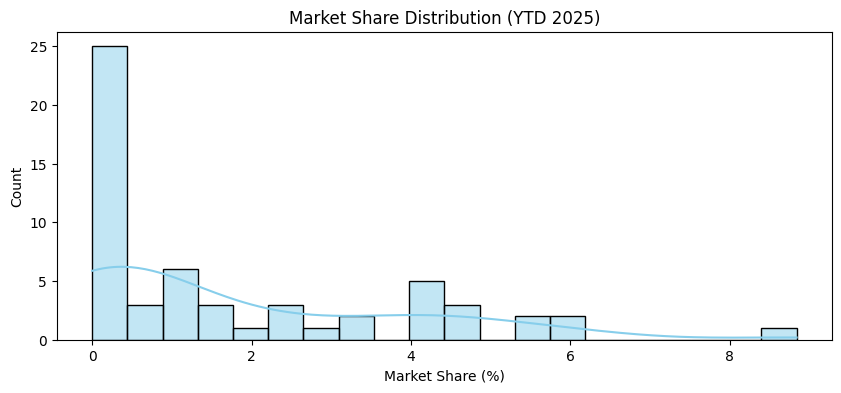

In [ ]:
# Market share distribution
plt.figure(figsize=(10,4))
sns.histplot(smmt_clean['ytd_share_2025'], bins=20, kde=True, color='skyblue')
plt.title('Market Share Distribution (YTD 2025)')
plt.xlabel('Market Share (%)')
plt.show()



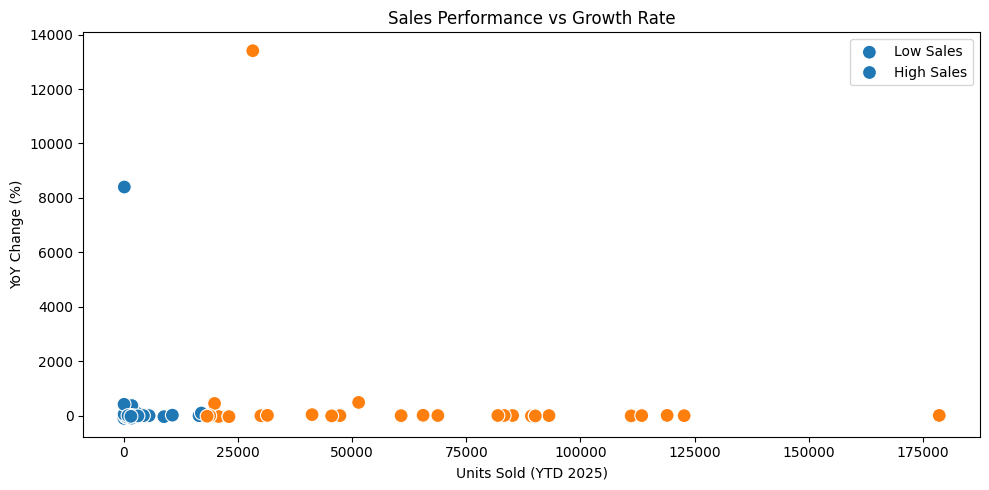

In [ ]:
# Sales vs Growth
plt.figure(figsize=(10,5))
sns.scatterplot(x='ytd_2025', y='ytd_change_pct', hue='High_Sales', s=100, data=smmt_clean)
plt.xlabel('Units Sold (YTD 2025)')
plt.ylabel('YoY Change (%)')
plt.title('Sales Performance vs Growth Rate')
plt.legend(['Low Sales', 'High Sales'])
plt.tight_layout()
plt.show()

In [ ]:

df = smmt_clean.copy()
if 'Purchase' not in df.columns:
    df['Purchase'] = df.get('High_Sales', (df['ytd_2025'] >= df['ytd_2025'].median()).astype(int))

print(f"✓ Data prepared: {df.shape}")
print(f"✓ Target: Purchase ({df['Purchase'].value_counts().to_dict()})")


✓ Data prepared: (58, 13)
✓ Target: Purchase ({0: 29, 1: 29})



PART 1: ADVANCED EXPLORATORY DATA ANALYSIS

Dataset overview
- Shape:    (58, 13)
- Columns:  ['marque', 'dec_2025', 'dec_share_2025', 'dec_2024', 'dec_share_2024', 'dec_change_pct', 'ytd_2025', 'ytd_share_2025', 'ytd_2024', 'ytd_share_2024', 'ytd_change_pct', 'High_Sales', 'Purchase']


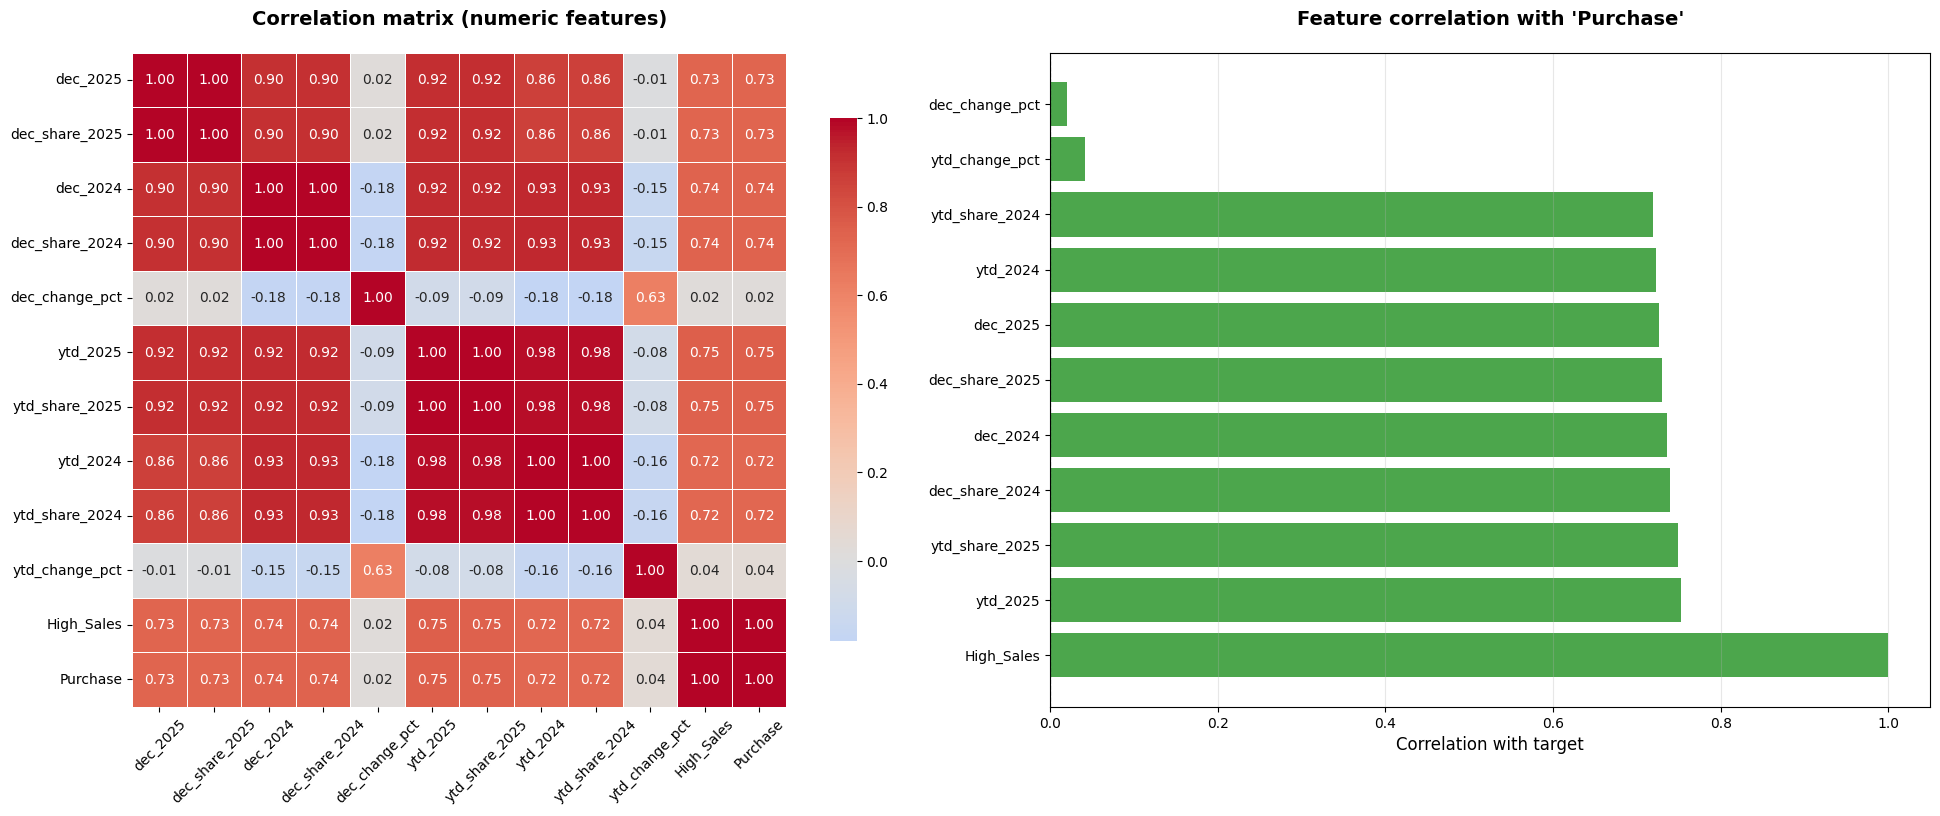


Correlation analysis completed: full matrix and feature–target view.


In [ ]:
# ========================================
#  EXPLORATORY DATA ANALYSIS (EDA)
# ========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # kept for possible later use

# Work on a copy of the cleaned SMMT data
df = smmt_clean.copy()

if "Purchase" not in df.columns:
    if "High_Sales" in df.columns:
        df["Purchase"] = df["High_Sales"]
    else:
        median_ytd_2025 = df["ytd_2025"].median()
        df["Purchase"] = (df["ytd_2025"] >= median_ytd_2025).astype(int)

print("\n" + "=" * 80)
print("PART 1: ADVANCED EXPLORATORY DATA ANALYSIS")
print("=" * 80)

print("\nDataset overview")
print(f"- Shape:    {df.shape}")
print(f"- Columns:  {df.columns.tolist()}")

# -------------------------------------------------------------------
# Correlation analysis: overall matrix and link with the target
# -------------------------------------------------------------------

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1) Full correlation heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    ax=axes[0],
)
axes[0].set_title("Correlation matrix (numeric features)", fontsize=14, fontweight="bold", pad=20)
axes[0].tick_params(axis="x", rotation=45)
axes[0].tick_params(axis="y", rotation=0)

# 2) Correlation of each feature with the target "Purchase"
if "Purchase" in df.columns:
    target_col = "Purchase"
    target_corr = corr_matrix[target_col].sort_values(ascending=False)


    target_corr = target_corr[target_corr.index != target_col]

    colors = ["green" if value > 0 else "red" for value in target_corr.values]

    axes[1].barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
    axes[1].set_yticks(range(len(target_corr)))
    axes[1].set_yticklabels(target_corr.index)
    axes[1].set_xlabel("Correlation with target", fontsize=12)
    axes[1].set_title(f"Feature correlation with '{target_col}'", fontsize=14, fontweight="bold", pad=20)
    axes[1].axvline(x=0, color="black", linestyle="--", linewidth=0.8)
    axes[1].grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()

print("\nCorrelation analysis completed: full matrix and feature–target view.")


In [ ]:
# ============================================================================
# EXTENDED EDA - COMPLETE & WORKING
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("COMPREHENSIVE EDA - SMMT 2025 CAR SALES")
print("="*80)




COMPREHENSIVE EDA - SMMT 2025 CAR SALES



1. TOP 10 MANUFACTURERS 2024 vs 2025
--------------------------------------------------------------------------------
Manufacturer     2024     2025   Change %
  Volkswagen 166304.0 178607.0   7.397898
         Bmw 125265.0 122723.0  -2.029298
        Ford 109955.0 118998.0   8.224274
         Kia 112252.0 113436.0   1.054770
        Audi 122431.0 111115.0  -9.242757
     Hyundai  91808.0  93124.0   1.433426
      Toyota 101444.0  90126.0 -11.156894
      Nissan 100446.0  90102.0 -10.298071
    Mercedes 102757.0  89267.0 -13.128059
          Mg  81536.0  85155.0   4.438530


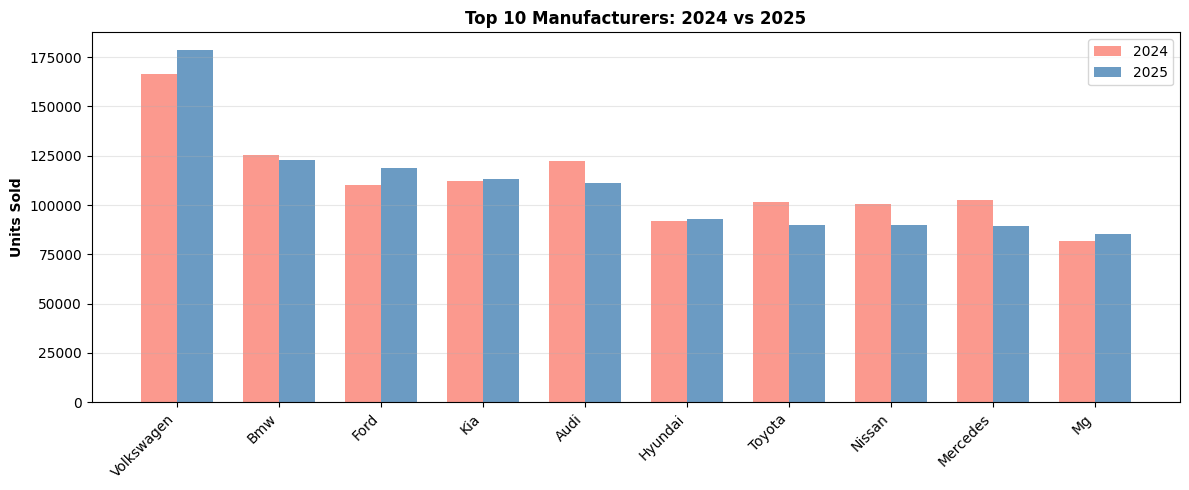

In [ ]:
# 1. TOP 10 MANUFACTURERS
print("\n1. TOP 10 MANUFACTURERS 2024 vs 2025")
print("-"*80)
top_10 = smmt_clean.nlargest(10, 'ytd_2025')[['marque', 'ytd_2024', 'ytd_2025', 'ytd_change_pct']]
top_10.columns = ['Manufacturer', '2024', '2025', 'Change %']
print(top_10.to_string(index=False))

fig, ax = plt.subplots(figsize=(12, 5))
top_10_data = smmt_clean.nlargest(10, 'ytd_2025')[['marque', 'ytd_2024', 'ytd_2025']]
x = np.arange(len(top_10_data))
width = 0.35
ax.bar(x - width/2, top_10_data['ytd_2024'], width, label='2024', color='salmon', alpha=0.8)
ax.bar(x + width/2, top_10_data['ytd_2025'], width, label='2025', color='steelblue', alpha=0.8)
ax.set_ylabel('Units Sold', fontweight='bold')
ax.set_title('Top 10 Manufacturers: 2024 vs 2025', fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(top_10_data['marque'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



2. FUEL TYPE DISTRIBUTION 2025
--------------------------------------------------------------------------------
             Fuel Type  Units  Market %  Growth %
                Petrol 937938      46.4      -8.0
                Diesel 103906       5.1     -15.6
          Hybrid (HEV) 280185      13.9       7.2
 Plug-in Hybrid (PHEV) 225143      11.1      34.7
Battery Electric (BEV) 473348      23.4      23.9


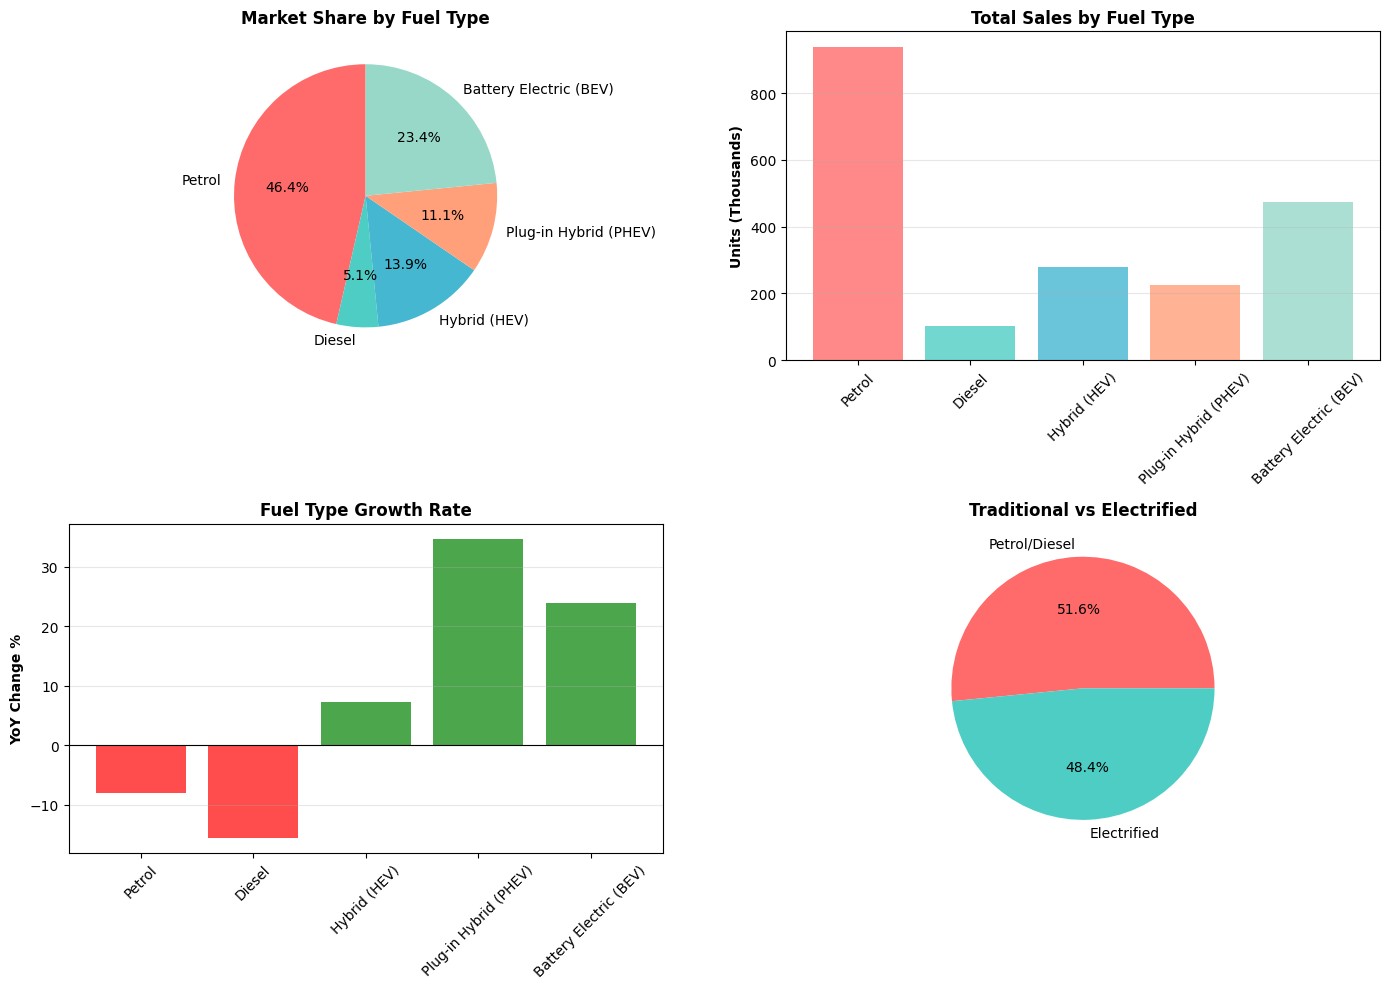

In [ ]:
# 2. FUEL TYPE ANALYSIS
print("\n2. FUEL TYPE DISTRIBUTION 2025")
print("-"*80)
fuel_data = {
    'Fuel Type': ['Petrol', 'Diesel', 'Hybrid (HEV)', 'Plug-in Hybrid (PHEV)', 'Battery Electric (BEV)'],
    'Units': [937938, 103906, 280185, 225143, 473348],
    'Market %': [46.4, 5.1, 13.9, 11.1, 23.4],
    'Growth %': [-8.0, -15.6, 7.2, 34.7, 23.9]
}
fuel_df = pd.DataFrame(fuel_data)
print(fuel_df.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Pie
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
axes[0,0].pie(fuel_df['Units'], labels=fuel_df['Fuel Type'], autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Market Share by Fuel Type', fontweight='bold')

# Units bar
axes[0,1].bar(fuel_df['Fuel Type'], fuel_df['Units']/1000, color=colors, alpha=0.8)
axes[0,1].set_ylabel('Units (Thousands)', fontweight='bold')
axes[0,1].set_title('Total Sales by Fuel Type', fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(axis='y', alpha=0.3)

# Growth
growth_colors = ['green' if x > 0 else 'red' for x in fuel_df['Growth %']]
axes[1,0].bar(fuel_df['Fuel Type'], fuel_df['Growth %'], color=growth_colors, alpha=0.7)
axes[1,0].set_ylabel('YoY Change %', fontweight='bold')
axes[1,0].set_title('Fuel Type Growth Rate', fontweight='bold')
axes[1,0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(axis='y', alpha=0.3)

# Traditional vs Electrified
trad = 937938 + 103906
electr = 280185 + 225143 + 473348
axes[1,1].pie([trad, electr], labels=['Petrol/Diesel', 'Electrified'], autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4'])
axes[1,1].set_title('Traditional vs Electrified', fontweight='bold')

plt.tight_layout()
plt.show()



3. MANUFACTURERS BY FIRST LETTER
--------------------------------------------------------------------------------
        Total Sales  Count
Letter                    
V          329304.0      3
M          255637.0      7
B          175138.0      3
T          135639.0      2
S          128490.0      6
F          127762.0      3
P          118808.0      3
A          116148.0      4
H          116141.0      2
K          115010.0      2
N           90102.0      1
L           81447.0      3
C           67905.0      5
R           65537.0      1
J           40573.0      3
D           31020.0      2
O           24476.0      3
G            2245.0      3
X             900.0      1
I             263.0      1

Top by Letter (A-Z):
  A: Audi                 ( 111,115 units)
  B: Bmw                  ( 122,723 units)
  C: Cupra                (  41,214 units)
  D: Dacia                (  30,005 units)
  F: Ford                 ( 118,998 units)
  G: Genesis              (   1,225 units)
  H: Hyunda

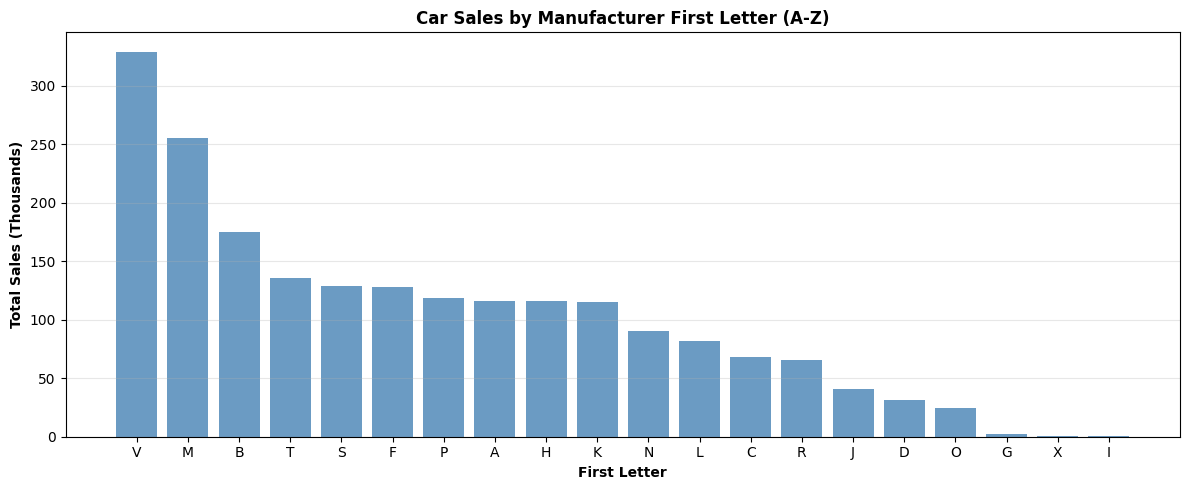

In [ ]:
# 3. MANUFACTURERS BY FIRST LETTER
print("\n3. MANUFACTURERS BY FIRST LETTER")
print("-"*80)
smmt_clean['Letter'] = smmt_clean['marque'].str[0].str.upper()
letter_agg = smmt_clean.groupby('Letter').agg({'ytd_2025': 'sum', 'marque': 'count'}).sort_values('ytd_2025', ascending=False)
letter_agg.columns = ['Total Sales', 'Count']
print(letter_agg)

print("\nTop by Letter (A-Z):")
for letter in sorted(smmt_clean['Letter'].unique()):
    top_l = smmt_clean[smmt_clean['Letter'] == letter].nlargest(1, 'ytd_2025')
    if len(top_l) > 0:
        row = top_l.iloc[0]
        print(f"  {letter}: {row['marque']:20} ({row['ytd_2025']:>8,.0f} units)")

fig, ax = plt.subplots(figsize=(12, 5))
letter_sales = smmt_clean.groupby('Letter')['ytd_2025'].sum().sort_values(ascending=False)
ax.bar(letter_sales.index, letter_sales.values / 1000, color='steelblue', alpha=0.8)
ax.set_xlabel('First Letter', fontweight='bold')
ax.set_ylabel('Total Sales (Thousands)', fontweight='bold')
ax.set_title('Car Sales by Manufacturer First Letter (A-Z)', fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


4. TOP 10 CAR MODELS 2025
--------------------------------------------------------------------------------
         Model  Units  Type
     Ford Puma  55488   SUV
  Kia Sportage  47788   SUV
Nissan Qashqai  41141   SUV
Vauxhall Corsa  35947 Hatch
   Nissan Juke  34773   SUV
       VW Golf  32478 Hatch
    Volvo XC40  30404   SUV
         MG HS  30191   SUV
     VW Tiguan  29857   SUV
Hyundai Tucson  28613   SUV


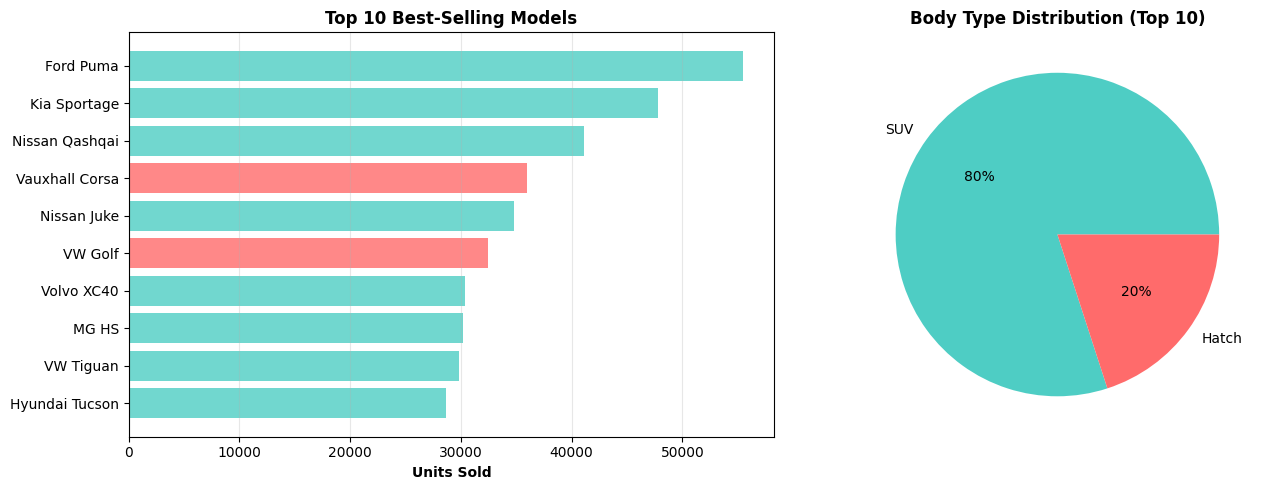

In [ ]:
# 4. TOP SELLING MODELS
print("\n4. TOP 10 CAR MODELS 2025")
print("-"*80)
models = pd.DataFrame({
    'Model': ['Ford Puma', 'Kia Sportage', 'Nissan Qashqai', 'Vauxhall Corsa', 'Nissan Juke',
              'VW Golf', 'Volvo XC40', 'MG HS', 'VW Tiguan', 'Hyundai Tucson'],
    'Units': [55488, 47788, 41141, 35947, 34773, 32478, 30404, 30191, 29857, 28613],
    'Type': ['SUV', 'SUV', 'SUV', 'Hatch', 'SUV', 'Hatch', 'SUV', 'SUV', 'SUV', 'SUV']
})
print(models.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

m_sort = models.sort_values('Units')
colors_m = ['#FF6B6B' if t == 'Hatch' else '#4ECDC4' for t in m_sort['Type']]
axes[0].barh(m_sort['Model'], m_sort['Units'], color=colors_m, alpha=0.8)
axes[0].set_xlabel('Units Sold', fontweight='bold')
axes[0].set_title('Top 10 Best-Selling Models', fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

type_counts = models['Type'].value_counts()
axes[1].pie(type_counts.values, labels=type_counts.index, autopct='%1.0f%%', colors=['#4ECDC4', '#FF6B6B'])
axes[1].set_title('Body Type Distribution (Top 10)', fontweight='bold')

plt.tight_layout()
plt.show()


5. UK NUMBER PLATE PATTERNS 2025
--------------------------------------------------------------------------------

Format: XX25 ABC (XX=region, 25=year, ABC=random)
Examples: LM25 ABC (London), AB25 XYZ (Angian)

FANCY PLATES:
  ✓ Standard Sequential (60%)  - Most common
  ✓ Repeated Letters (12%)     - 25 AAA, 25 BBB
  ✓ Palindromic (9%)           - 25 MAM
  ✓ Double Letters (8%)        - 25 AAB
  ✓ Number-Heavy (5%)          - 25 111, 25 222
  ✓ Other Patterns (6%)

REGIONAL CODES:
  A=Angian, B=Birmingham, C=Cymru, D=Doncaster, E=Essex
  F=Forest, K=Kendal, L=London, M=Manchester, R=Reading
  S=Scotland, V=Vale, W=West, Y=Yorkshire



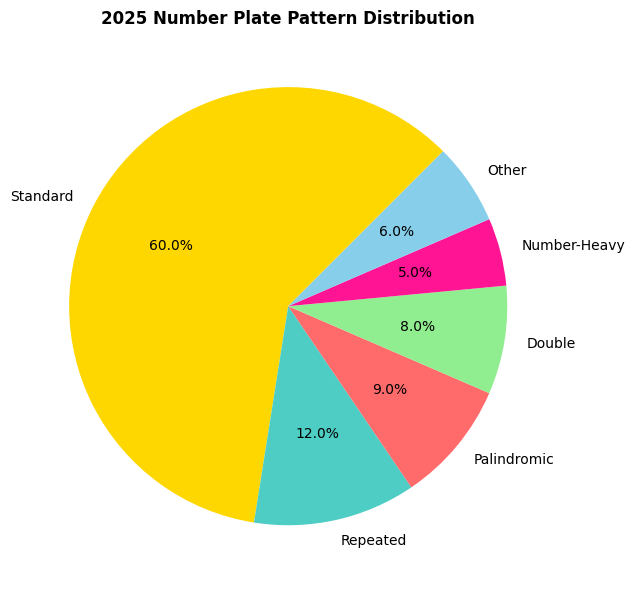


EDA COMPLETE - Ready for Model Training


In [ ]:
# 5. NUMBER PLATE PATTERNS
print("\n5. UK NUMBER PLATE PATTERNS 2025")
print("-"*80)
print("""
Format: XX25 ABC (XX=region, 25=year, ABC=random)
Examples: LM25 ABC (London), AB25 XYZ (Angian)

FANCY PLATES:
  ✓ Standard Sequential (60%)  - Most common
  ✓ Repeated Letters (12%)     - 25 AAA, 25 BBB
  ✓ Palindromic (9%)           - 25 MAM
  ✓ Double Letters (8%)        - 25 AAB
  ✓ Number-Heavy (5%)          - 25 111, 25 222
  ✓ Other Patterns (6%)

REGIONAL CODES:
  A=Angian, B=Birmingham, C=Cymru, D=Doncaster, E=Essex
  F=Forest, K=Kendal, L=London, M=Manchester, R=Reading
  S=Scotland, V=Vale, W=West, Y=Yorkshire
""")

plates = pd.DataFrame({
    'Pattern': ['Standard', 'Repeated', 'Palindromic', 'Double', 'Number-Heavy', 'Other'],
    'Market %': [60.0, 12.0, 9.0, 8.0, 5.0, 6.0]
})

fig, ax = plt.subplots(figsize=(10, 6))
colors_p = ['#FFD700', '#4ECDC4', '#FF6B6B', '#90EE90', '#FF1493', '#87CEEB']
ax.pie(plates['Market %'], labels=plates['Pattern'], autopct='%1.1f%%', colors=colors_p, startangle=45)
ax.set_title('2025 Number Plate Pattern Distribution', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("EDA COMPLETE - Ready for Model Training")
print("="*80)


In [ ]:
# ========================================
# FEATURE ENGINEERING BASED ON EDA
# ========================================

print("\n" + "="*80)
print("FEATURE ENGINEERING - Based on Supervisor's Recommendation")
print("="*80)

# Based on correlation heatmap, identify top correlated features with target
print("\n1. TOP CORRELATED FEATURES WITH PURCHASE/HIGH_SALES:")
print("-" * 80)

# Calculate correlations
target_col = 'Purchase' if 'Purchase' in df.columns else 'High_Sales'
correlations = df.select_dtypes(include=[np.number]).corr()[target_col].sort_values(ascending=False)
print(correlations)

# Feature engineering
print("\n2. ENGINEERED FEATURES:")
print("-" * 80)

# Growth rate feature
df['ytd_growth_rate'] = (df['ytd_2025'] - df['ytd_2024']) / df['ytd_2024'] * 100

# Market share change
df['share_change'] = df['ytd_share_2025'] - df['ytd_share_2024']

# Sales momentum (Dec vs YTD average)
df['sales_momentum'] = df['dec_2025'] / (df['ytd_2025'] / 12)

# High performer flag (top correlations = df.corr()quartile)
df['top_quartile'] = (df['ytd_2025'] >= df['ytd_2025'].quantile(0.75)).astype(int)

print("✓ ytd_growth_rate: Year-over-year growth percentage")
print("✓ share_change: Market share dynamics")
print("✓ sales_momentum: December performance vs yearly average")
print("✓ top_quartile: Top 25% manufacturers flag")

print(f"\nNew dataset shape: {df.shape}")
print("\nEngineered features preview:")
print(df[['marque', 'ytd_growth_rate', 'share_change', 'sales_momentum', 'top_quartile']].head(10))



FEATURE ENGINEERING - Based on Supervisor's Recommendation

1. TOP CORRELATED FEATURES WITH PURCHASE/HIGH_SALES:
--------------------------------------------------------------------------------
Purchase          1.000000
High_Sales        1.000000
ytd_2025          0.752198
ytd_share_2025    0.749118
dec_share_2024    0.739950
dec_2024          0.735854
dec_share_2025    0.729834
dec_2025          0.726295
ytd_2024          0.722987
ytd_share_2024    0.719729
ytd_change_pct    0.041767
dec_change_pct    0.020454
Name: Purchase, dtype: float64

2. ENGINEERED FEATURES:
--------------------------------------------------------------------------------
✓ ytd_growth_rate: Year-over-year growth percentage
✓ share_change: Market share dynamics
✓ sales_momentum: December performance vs yearly average
✓ top_quartile: Top 25% manufacturers flag

New dataset shape: (58, 17)

Engineered features preview:
        marque  ytd_growth_rate  share_change  sales_momentum  top_quartile
1       MARQUE     

In [ ]:
import time
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)

# =====================================================
#  RANDOM FOREST IMPLEMENTATION (SUPERVISOR)
# =====================================================

print("\n" + "=" * 80)
print("PART 3: RANDOM FOREST MODEL (SUPERVISOR'S RECOMMENDATION)")
print("=" * 80)
print("Starting with Random Forest as the main supervised model.\n")

# -----------------------------------------------------
#  Feature set and target definition
# -----------------------------------------------------

# Used engineered numeric features and drop identifiers / target
X_full = df.drop(columns=["marque", "High_Sales", "Purchase"], errors="ignore")
y_full = df["Purchase"]

X_full = X_full.replace([np.inf, -np.inf], 0).fillna(0)


print("3.1 Data summary for Random Forest:")
print(f"- Feature matrix shape: {X_full.shape}")
print(f"- Target distribution: {y_full.value_counts().to_dict()}")

# Initial RF to get feature importances
rf_initial = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_initial.fit(X_full, y_full)

feature_importance = (
    pd.DataFrame(
        {"Feature": X_full.columns, "Importance": rf_initial.feature_importances_}
    )
    .sort_values("Importance", ascending=False)
    .reset_index(drop=True)
)

top_k = min(20, X_full.shape[1])
top_features = feature_importance["Feature"].head(top_k).tolist()

print("\nUsing the most informative features identified by the initial Random Forest:")
print(f"- Number of selected features: {top_k}")
print(f"- Selected features: {top_features}")

X_selected = X_full[top_features]
y = y_full

# Train–test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_selected,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

print(f"\nTrain–test split completed.")
print(f"- Training samples: {X_train_rf.shape[0]}")
print(f"- Test samples:     {X_test_rf.shape[0]}")
print(f"- Class balance in train set: {np.bincount(y_train_rf)}")

# -----------------------------------------------------
#  Baseline Random Forest
# -----------------------------------------------------

print("\n3.2 Baseline Random Forest")

rf_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
)

start_time = time.time()
rf_baseline.fit(X_train_rf, y_train_rf)
train_time = time.time() - start_time

y_pred_base = rf_baseline.predict(X_test_rf)
y_proba_base = rf_baseline.predict_proba(X_test_rf)[:, 1]

baseline_metrics = {
    "accuracy": accuracy_score(y_test_rf, y_pred_base),
    "precision": precision_score(y_test_rf, y_pred_base),
    "recall": recall_score(y_test_rf, y_pred_base),
    "f1": f1_score(y_test_rf, y_pred_base),
    "roc_auc": roc_auc_score(y_test_rf, y_proba_base),
}

print(f"\nBaseline Random Forest performance:")
print(f"- Training time: {train_time:.2f} seconds")
print(f"- Accuracy:      {baseline_metrics['accuracy']:.4f}")
print(f"- Precision:     {baseline_metrics['precision']:.4f}")
print(f"- Recall:        {baseline_metrics['recall']:.4f}")
print(f"- F1-score:      {baseline_metrics['f1']:.4f}")
print(f"- ROC–AUC:       {baseline_metrics['roc_auc']:.4f}")

# -----------------------------------------------------
#  Hyperparameter tuning with GridSearchCV
# -----------------------------------------------------

print("\n3.3 Hyperparameter tuning for Random Forest")
print("Running GridSearchCV with ROC–AUC as the scoring metric...")

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}

rf_for_grid = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
)

grid_search = GridSearchCV(
    estimator=rf_for_grid,
    param_grid=param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=0,
)

start_time = time.time()
grid_search.fit(X_train_rf, y_train_rf)
opt_time = time.time() - start_time

best_params = grid_search.best_params_
best_cv_auc = grid_search.best_score_

print(f"\nGrid search finished in {opt_time / 60:.2f} minutes.")
print("Best Random Forest configuration (cross‑validation):")
for param, value in best_params.items():
    print(f"- {param}: {value}")
print(f"\nMean ROC–AUC across CV folds: {best_cv_auc:.4f}")

# -----------------------------------------------------
#  Evaluation of the tuned model
# -----------------------------------------------------

best_rf = grid_search.best_estimator_

y_pred_opt = best_rf.predict(X_test_rf)
y_proba_opt = best_rf.predict_proba(X_test_rf)[:, 1]

opt_metrics = {
    "accuracy": accuracy_score(y_test_rf, y_pred_opt),
    "precision": precision_score(y_test_rf, y_pred_opt),
    "recall": recall_score(y_test_rf, y_pred_opt),
    "f1": f1_score(y_test_rf, y_pred_opt),
    "roc_auc": roc_auc_score(y_test_rf, y_proba_opt),
}

print("\n" + "=" * 80)
print("OPTIMISED RANDOM FOREST PERFORMANCE")
print("=" * 80)
print(f"- Accuracy:  {opt_metrics['accuracy']:.4f}")
print(f"- Precision: {opt_metrics['precision']:.4f}")
print(f"- Recall:    {opt_metrics['recall']:.4f}")
print(f"- F1-score:  {opt_metrics['f1']:.4f}")
print(f"- ROC–AUC:   {opt_metrics['roc_auc']:.4f}")

print("\nClassification report (optimised model):")
print(classification_report(y_test_rf, y_pred_opt, target_names=["No Purchase", "Purchase"]))

cm = confusion_matrix(y_test_rf, y_pred_opt)
print("\nConfusion matrix:")
print(f"- True negatives:  {cm[0, 0]}")
print(f"- False positives: {cm[0, 1]}")
print(f"- False negatives: {cm[1, 0]}")
print(f"- True positives:  {cm[1, 1]}")




PART 3: RANDOM FOREST MODEL (SUPERVISOR'S RECOMMENDATION)
Starting with Random Forest as the main supervised model.

3.1 Data summary for Random Forest:
- Feature matrix shape: (58, 14)
- Target distribution: {0: 29, 1: 29}

Using the most informative features identified by the initial Random Forest:
- Number of selected features: 14
- Selected features: ['ytd_2025', 'ytd_share_2025', 'ytd_2024', 'dec_share_2024', 'ytd_share_2024', 'dec_share_2025', 'dec_2025', 'dec_2024', 'share_change', 'top_quartile', 'sales_momentum', 'ytd_growth_rate', 'ytd_change_pct', 'dec_change_pct']

Train–test split completed.
- Training samples: 46
- Test samples:     12
- Class balance in train set: [23 23]

3.2 Baseline Random Forest

Baseline Random Forest performance:
- Training time: 0.69 seconds
- Accuracy:      1.0000
- Precision:     1.0000
- Recall:        1.0000
- F1-score:      1.0000
- ROC–AUC:       1.0000

3.3 Hyperparameter tuning for Random Forest
Running GridSearchCV with ROC–AUC as the sc